<a href="https://colab.research.google.com/github/Athul64/ML-Assignment-4-Classification/blob/main/ML_Assignment_4_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Load the dataset
data = load_breast_cancer()

# Check its type
print(type(data))  # Output: <class 'sklearn.utils.Bunch'>

# See the available keys
print(data.keys()) # Output: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
                   # This confirms that data is a Bunch object, similar to a dictionary.

# Convert features to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable
df['target'] = data.target

# Map target values to class names
df['target_label'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Display the first few rows
df.head()

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [ ]:
# Display the number of rows and columns
print("The Number of Rows :", df.shape[0])
print("The Number of Columns :", df.shape[1])

The Number of Rows : 569
The Number of Columns : 32


In [ ]:
# provides an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Check for missing values
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# statistics that summarize of the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Check for duplicated values
print(f'Number Duplicated Entry Present in the Dataset Before Drop :',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(f'Number Duplicated Entry Present in the Dataset After Drop :',df.duplicated().sum())

Number Duplicated Entry Present in the Dataset Before Drop : 0
Number Duplicated Entry Present in the Dataset After Drop : 0


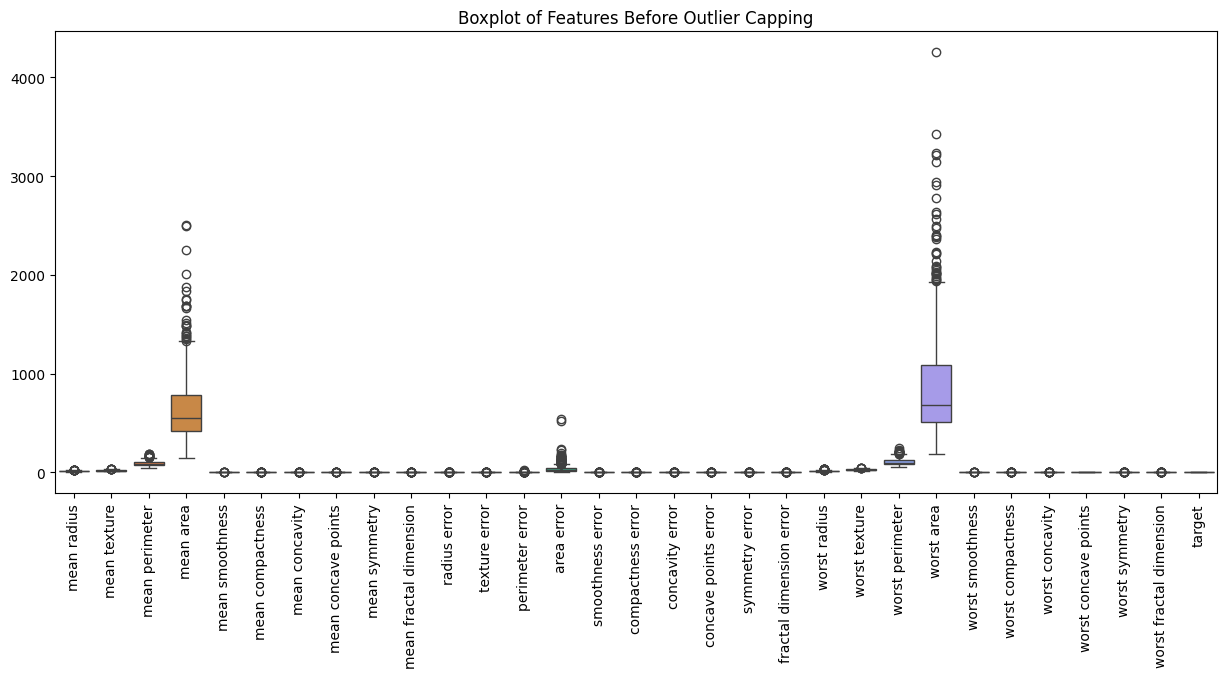

In [ ]:
# Plot boxplots for Detect the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, :31])  # First 10 features
plt.xticks(rotation=90)
plt.title("Boxplot of Features Before Outlier Capping")
plt.show()

In [ ]:
def cap_outliers(df, col):
    df_cleaned = df.copy()  # Make a copy to avoid modifying the original data
    for i in col:
        if df_cleaned[i].dtype in ['float64']:  # Ensure numeric columns only
            Q1 = np.nanquantile(df_cleaned[i], 0.25)  # Handle NaNs
            Q3 = np.nanquantile(df_cleaned[i], 0.75)
            IQR = Q3 - Q1

            # Define capping limits
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Apply capping
            df_cleaned[i] = np.where(df_cleaned[i] < lower_bound, lower_bound, df_cleaned[i])
            df_cleaned[i] = np.where(df_cleaned[i] > upper_bound, upper_bound, df_cleaned[i])

    return df_cleaned

outliers_col = df.select_dtypes(include=['float64']).columns  # Include both int and float

df_cleaned = cap_outliers(df, outliers_col)

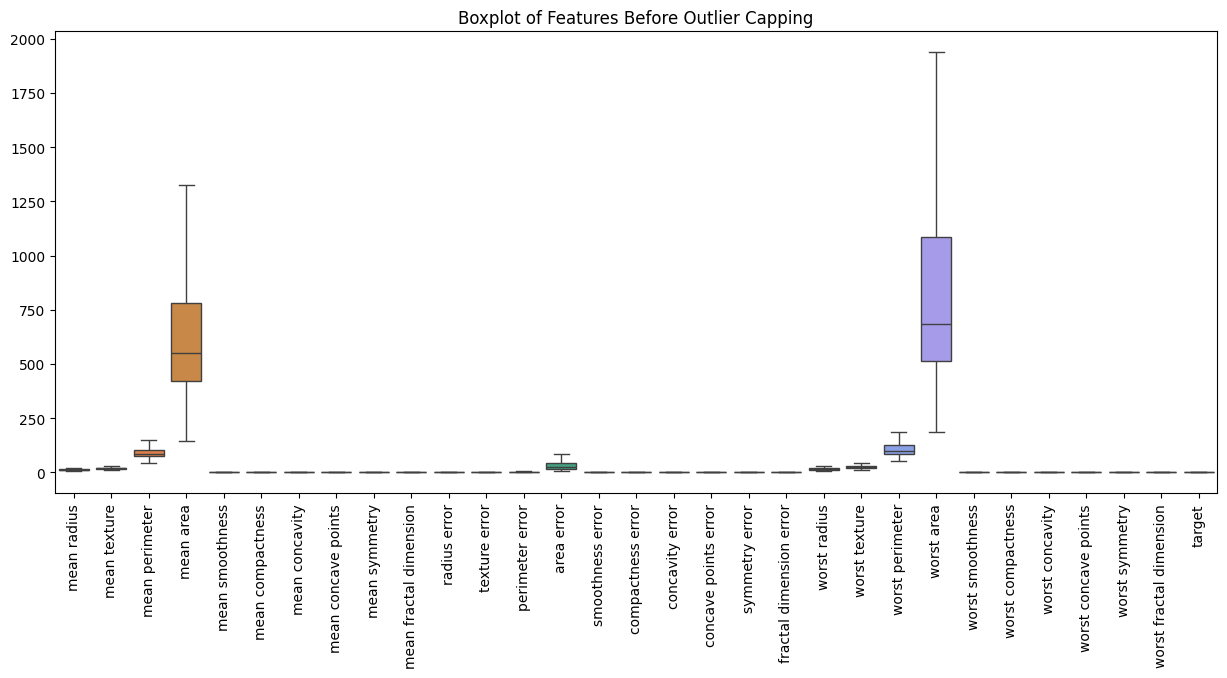

In [ ]:
# Plot boxplots for Detect the Outliers After IQR method
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned.iloc[:, :31])
plt.xticks(rotation=90)
plt.title("Boxplot of Features Before Outlier Capping")
plt.show()

In [ ]:
# Skewness before outlier capping
print("Skewness before outlier capping:")
print(df.select_dtypes(include=['float64']).skew())

# Skewness after outlier capping
print("\nSkewness after outlier capping:")
print(df_cleaned.select_dtypes(include=['float64']).skew())

Skewness before outlier capping:
mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.15

In [ ]:
# Get column names with float data type
skew_col_names = df_cleaned.select_dtypes(include=['float64']).columns  # Stores column names

# Compute skewness for selected columns
skew_values = df_cleaned[skew_col_names].skew()

# Display skewness values
print(skew_values)

mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             1.023859
mean concave points        1.004049
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               1.025031
texture error              0.740987
perimeter error            1.034389
area error                 1.130940
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 1.048970
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            0.809174
worst concave points       0

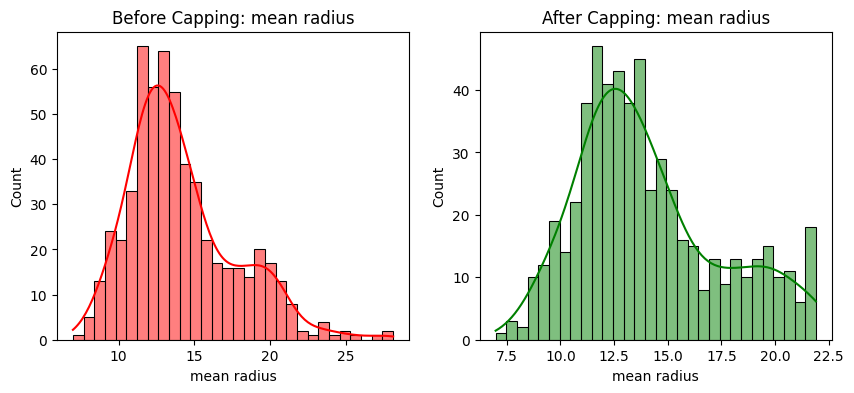

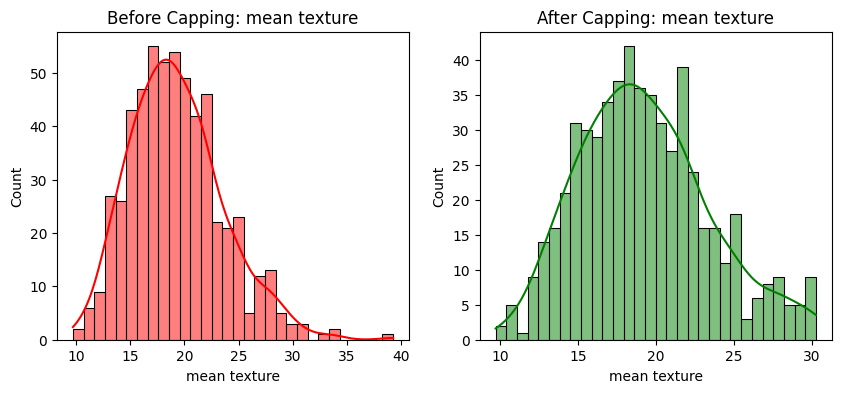

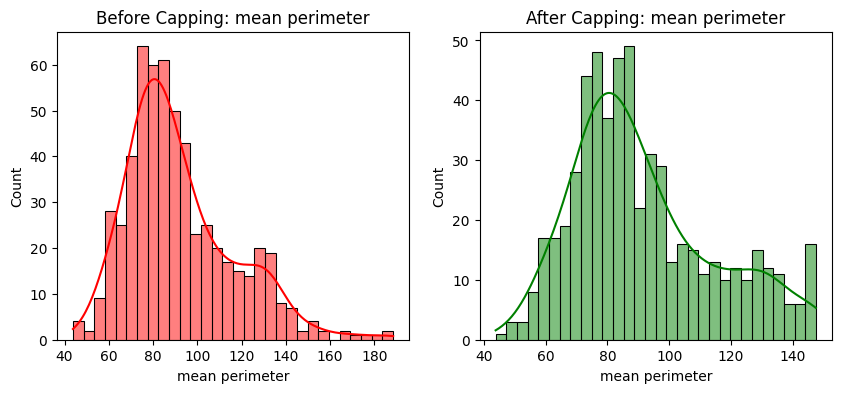

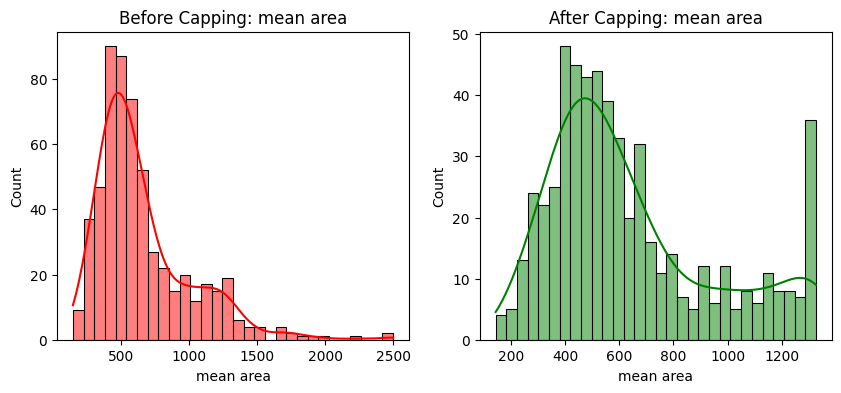

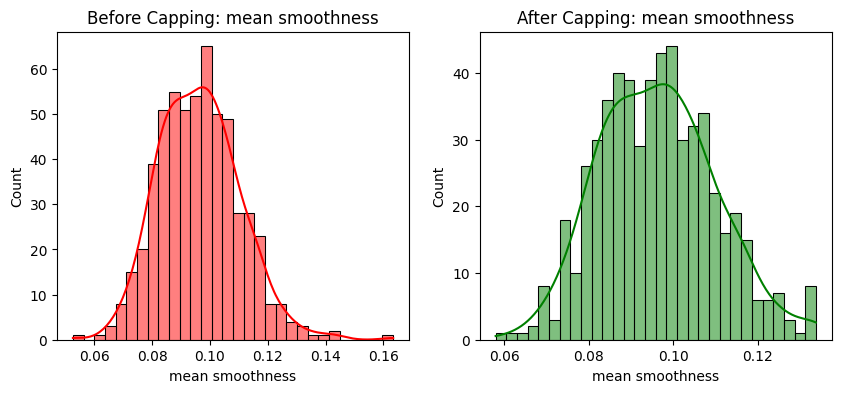

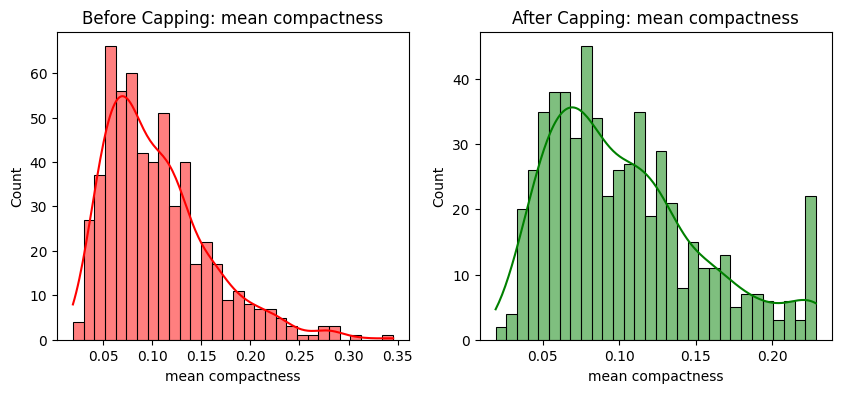

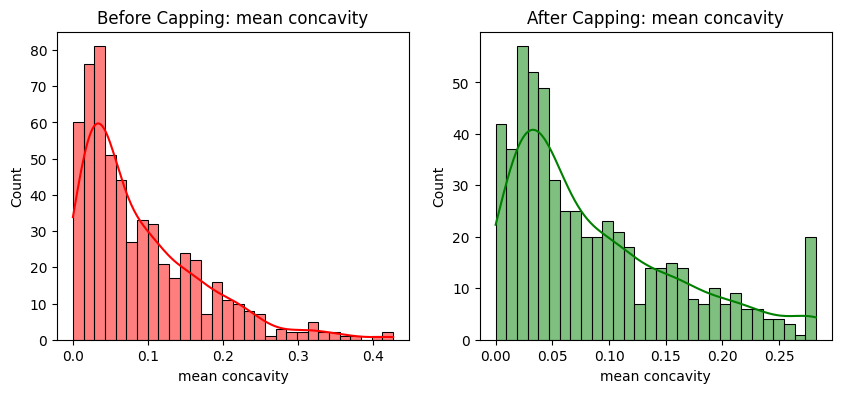

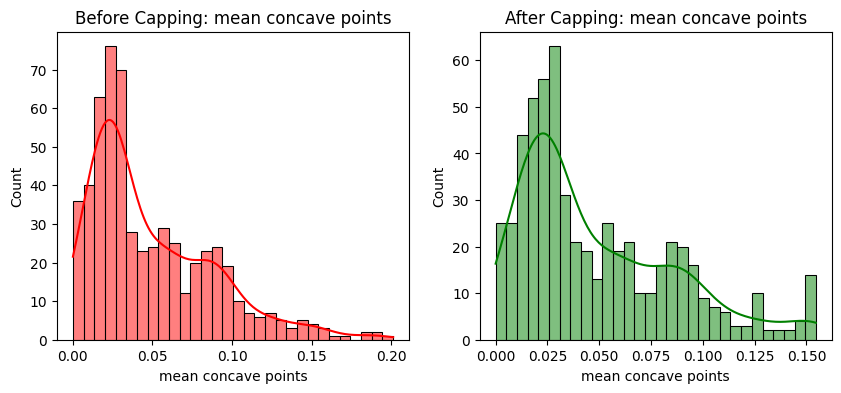

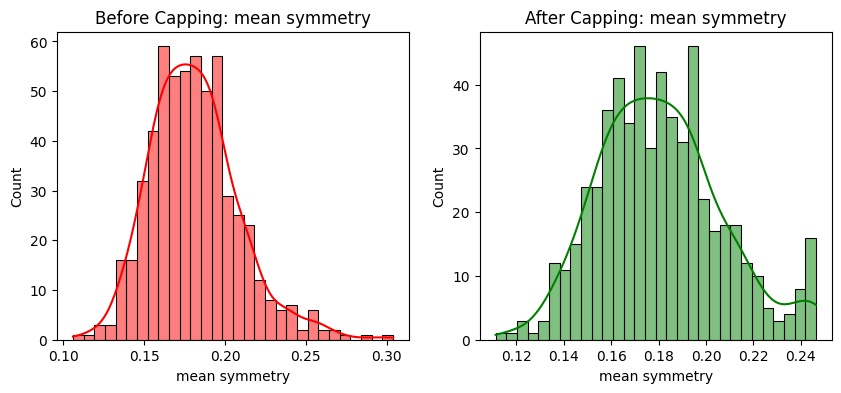

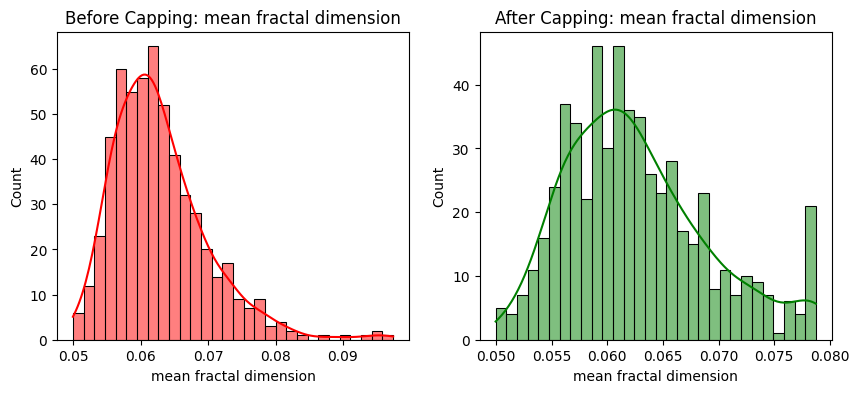

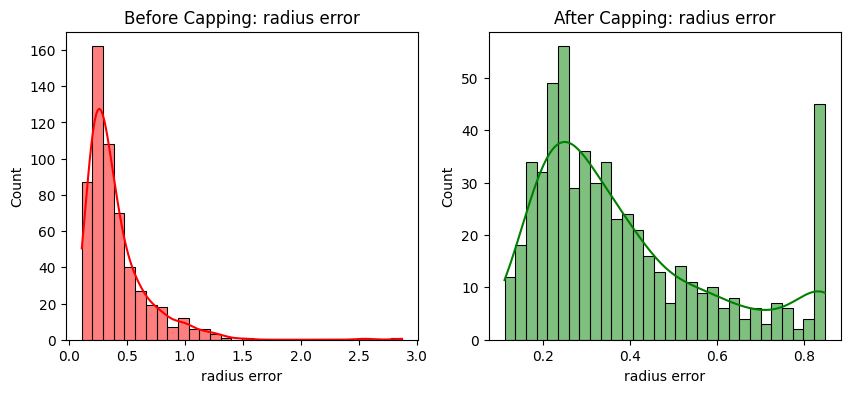

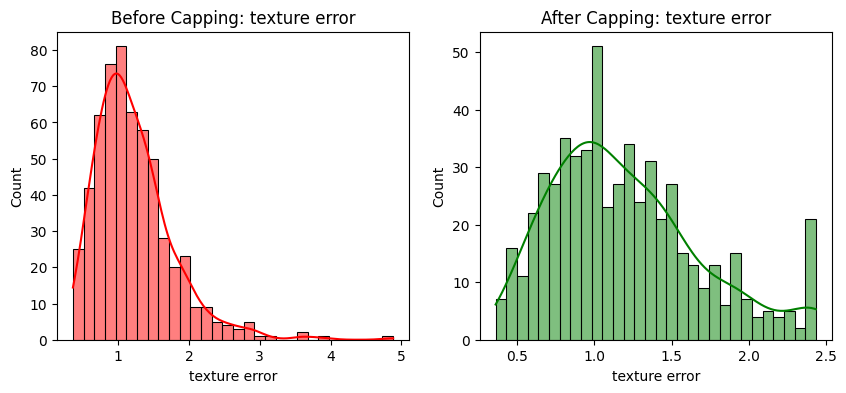

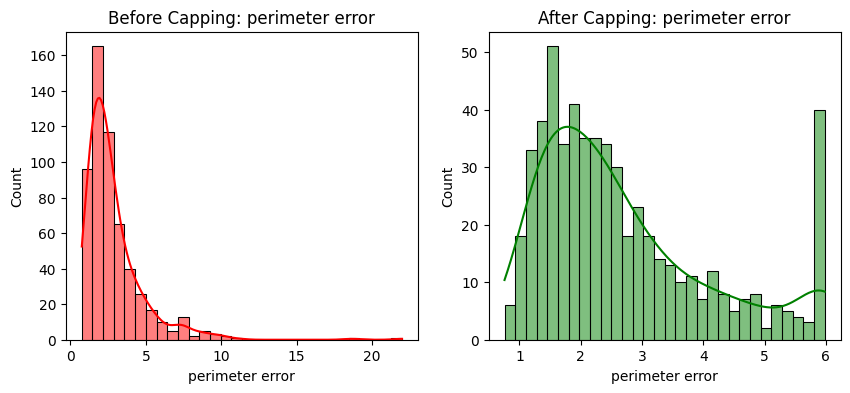

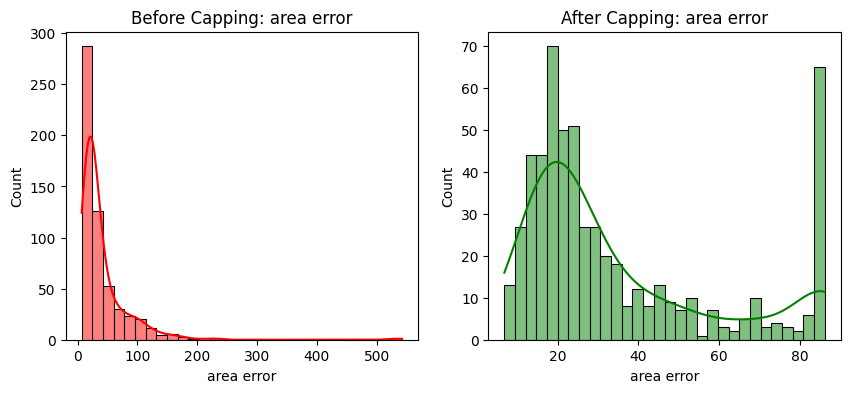

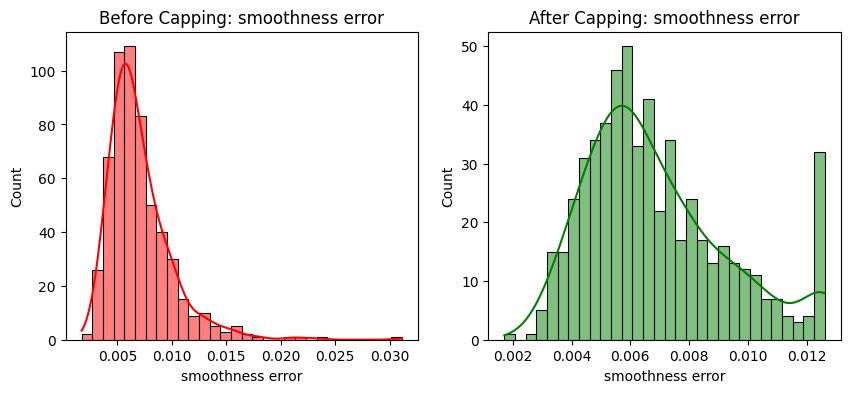

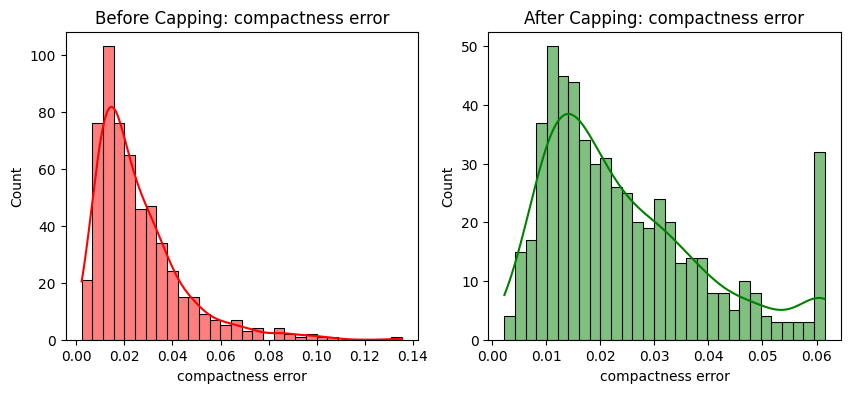

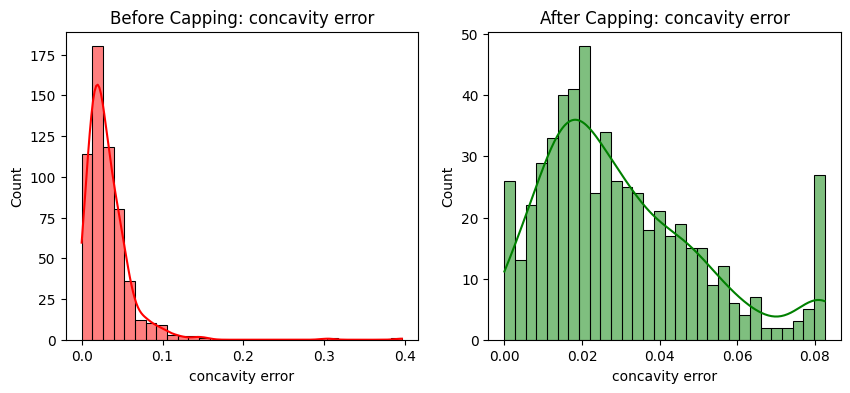

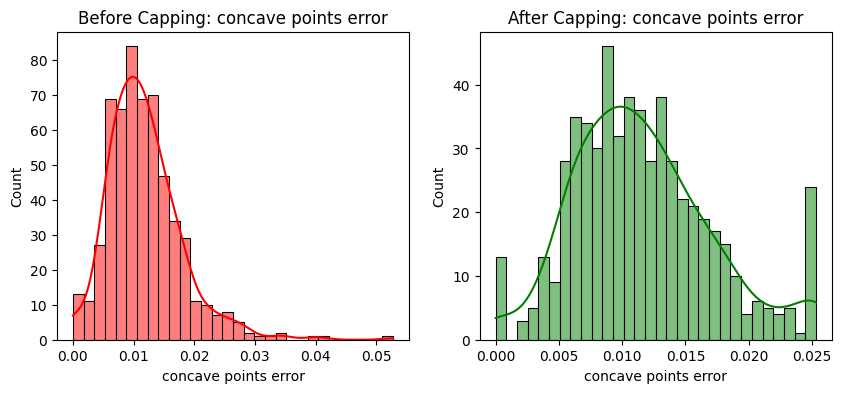

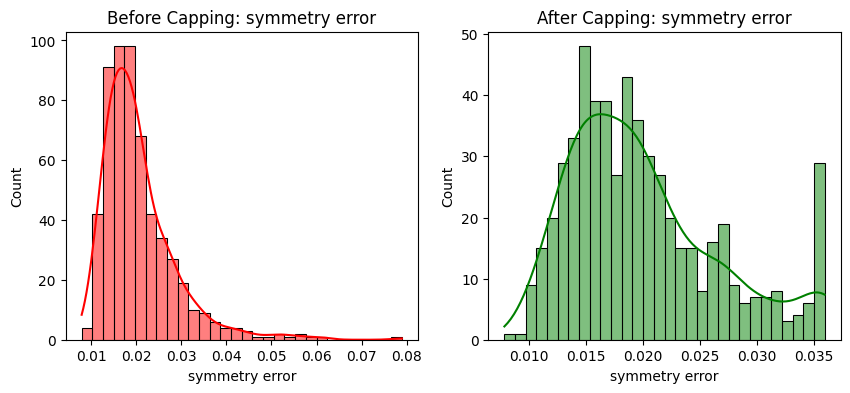

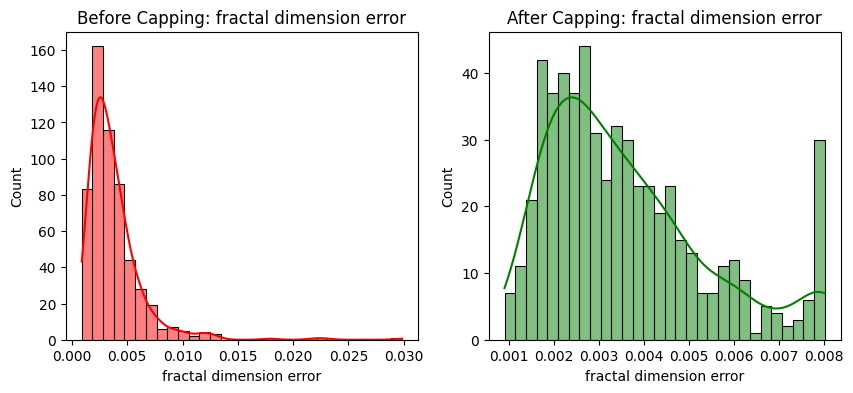

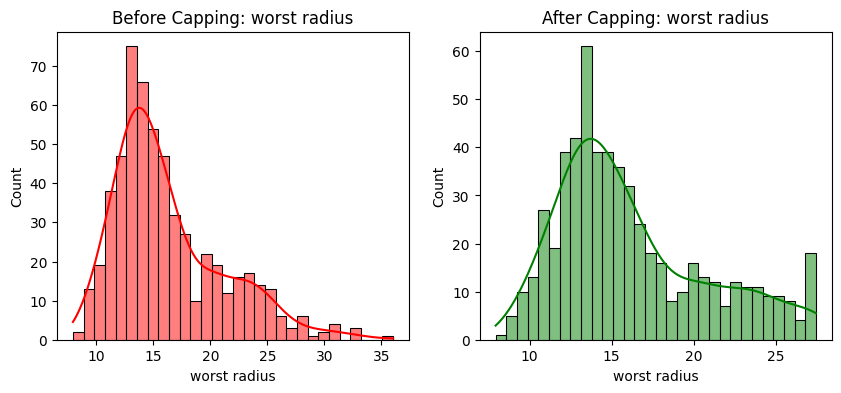

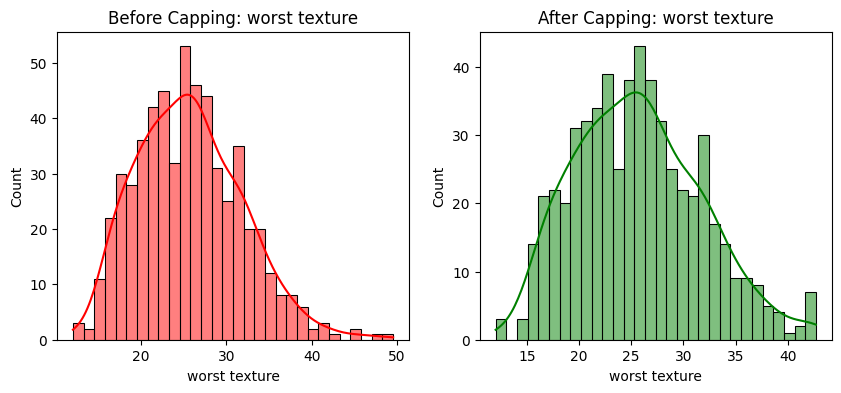

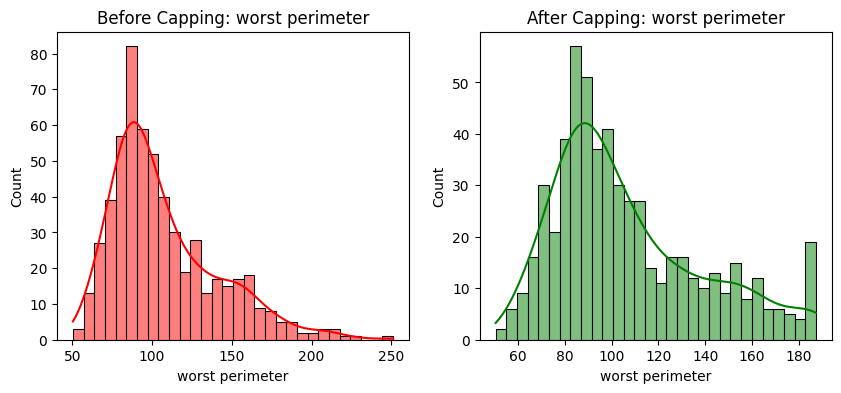

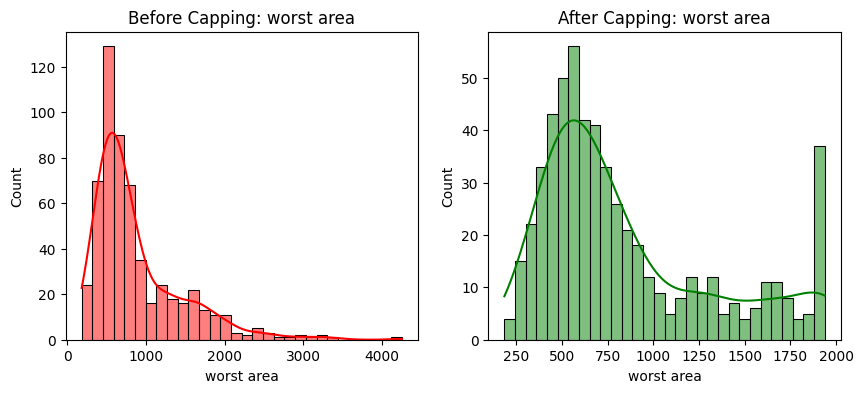

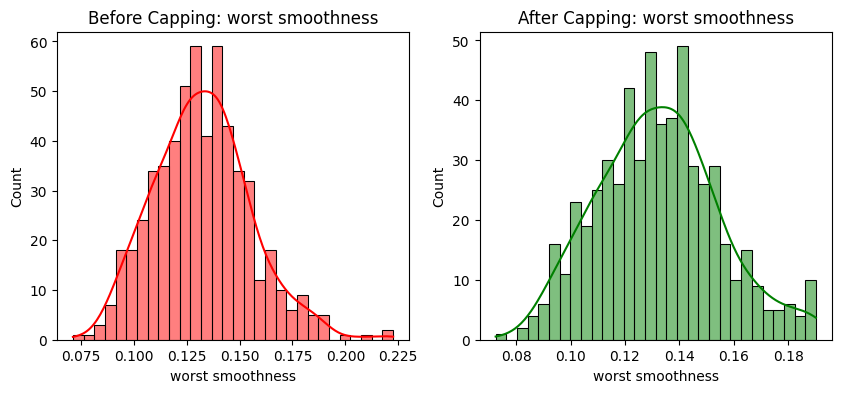

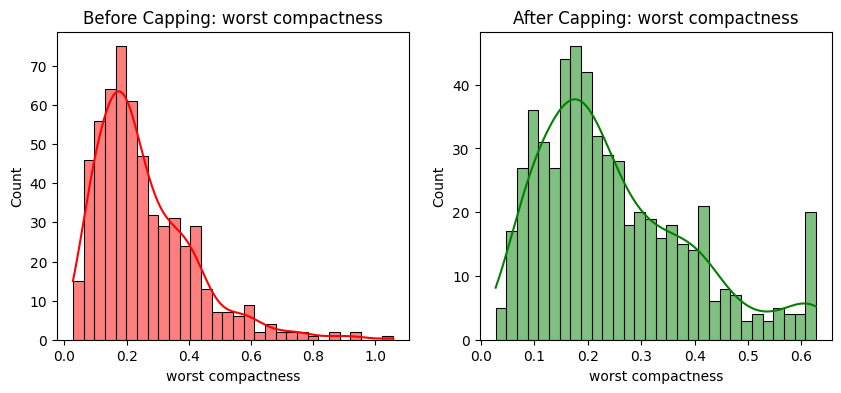

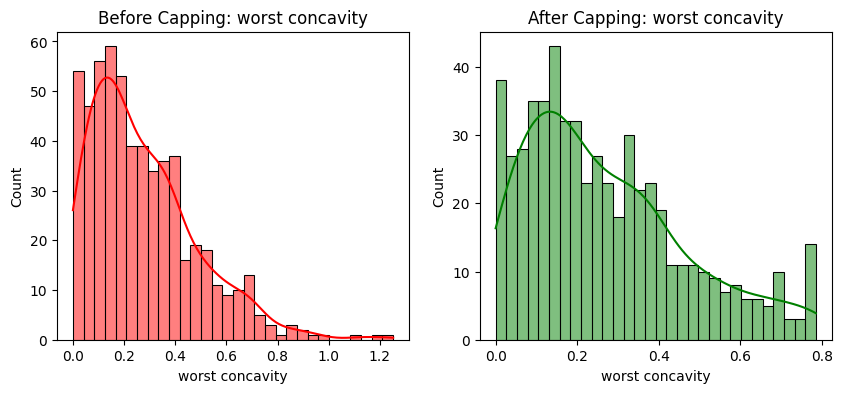

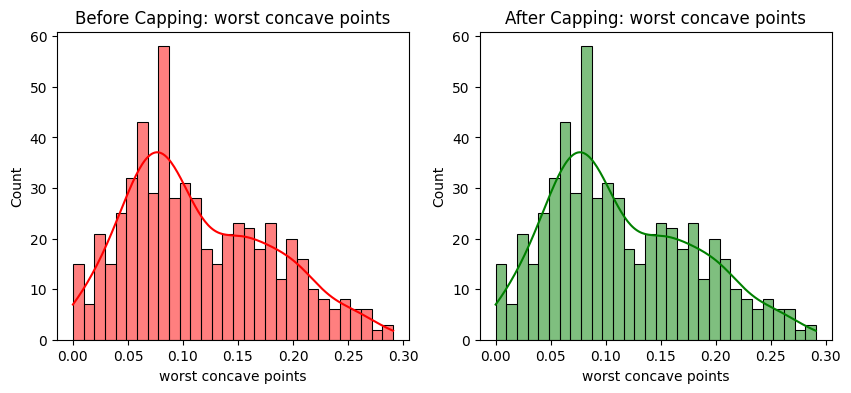

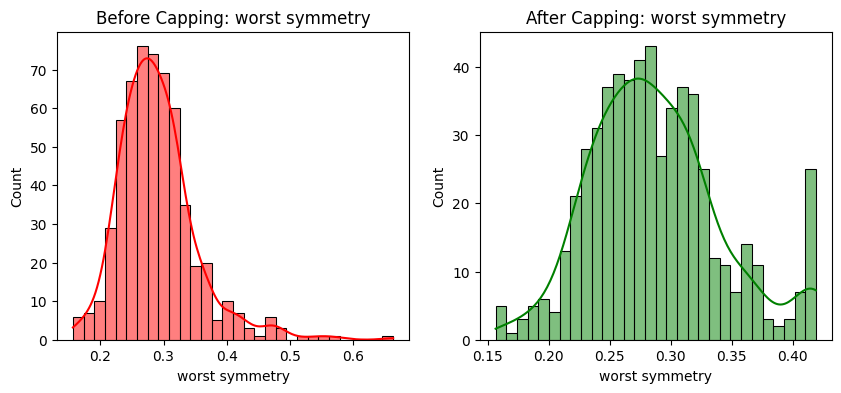

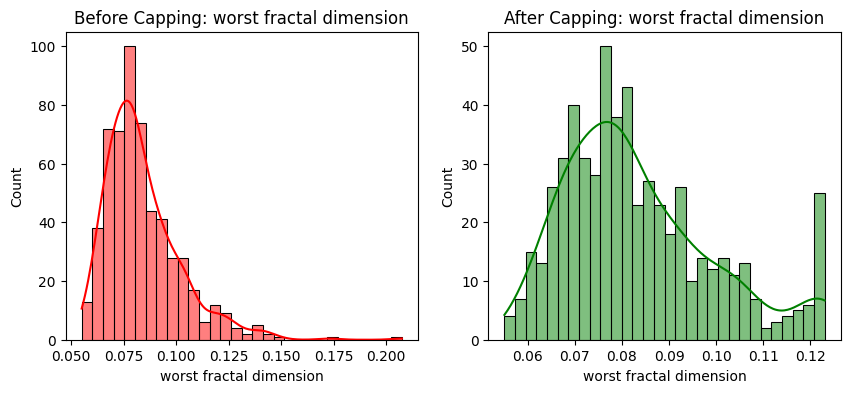

In [ ]:
# Visualization Before & After Capping
for col in outliers_col:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='red')
    plt.title(f"Before Capping: {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='green')
    plt.title(f"After Capping: {col}")

    plt.show()

In [ ]:
# Apply log transformation for highly skewed columns
for col in outliers_col:
    if abs(df_cleaned[col].skew()) > 1:  # If skewness is high
        df_cleaned[col] = np.log1p(df_cleaned[col])  # Apply log1p transformation

# Compute skewness AFTER log transformation
print("\nSkewness After Log Transformation:\n", df_cleaned[outliers_col].skew())


Skewness After Log Transformation:
 mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             0.914762
mean concave points        0.938802
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               0.819539
texture error              0.740987
perimeter error            0.472681
area error                 0.389419
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 0.251263
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            

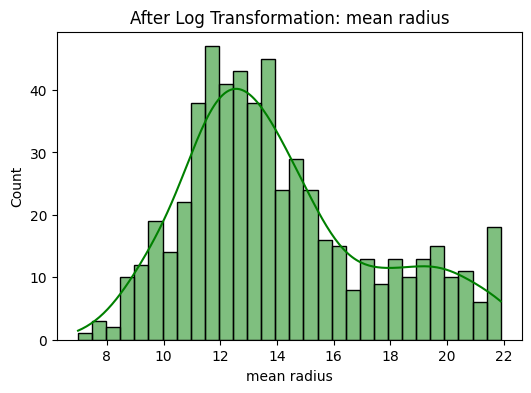

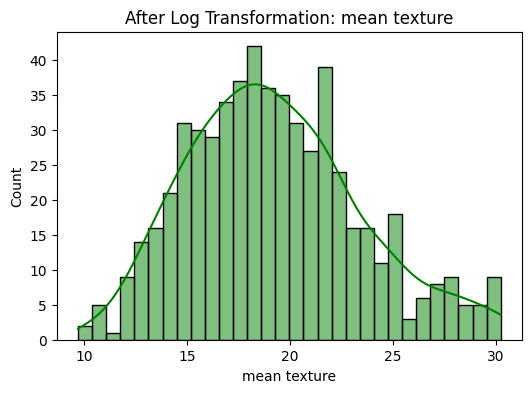

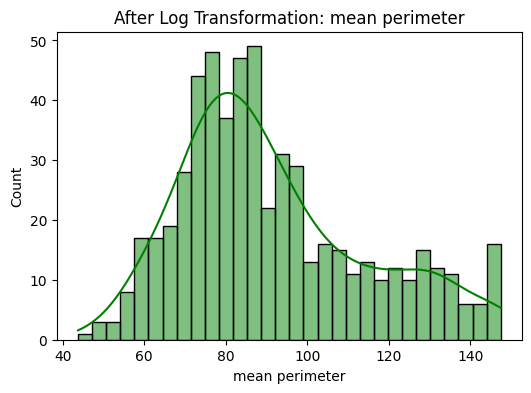

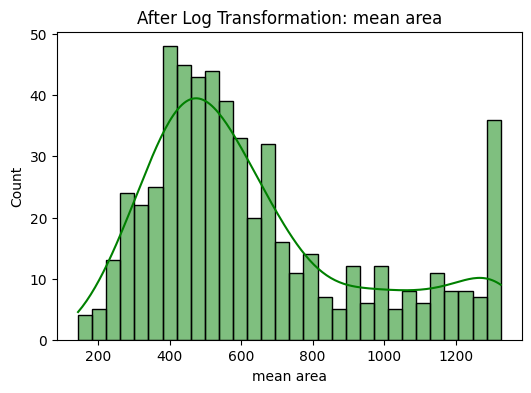

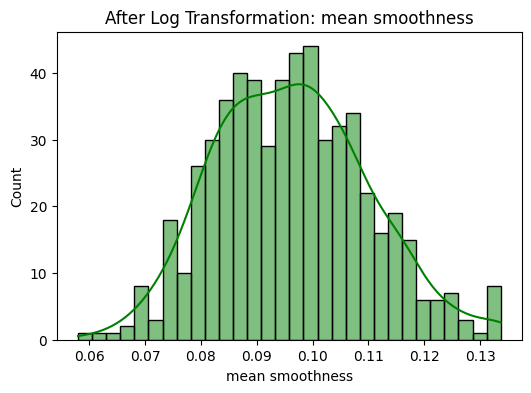

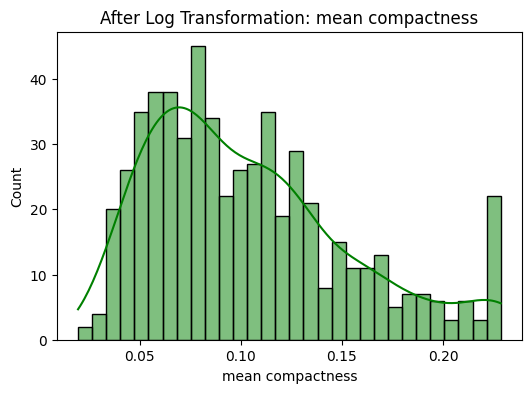

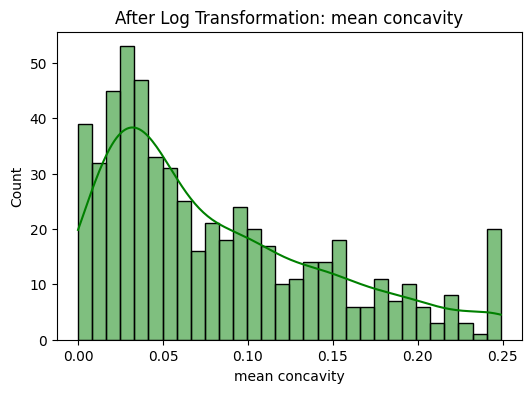

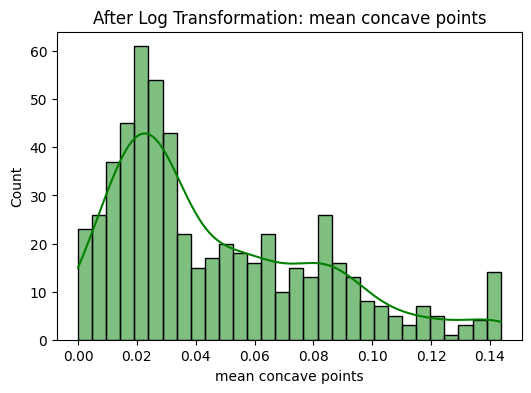

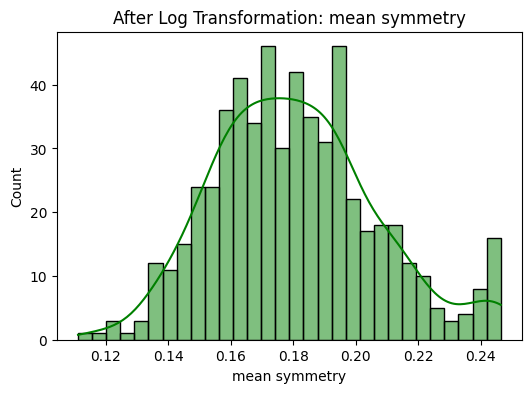

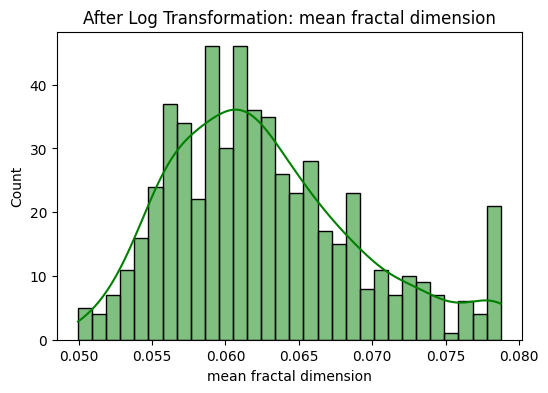

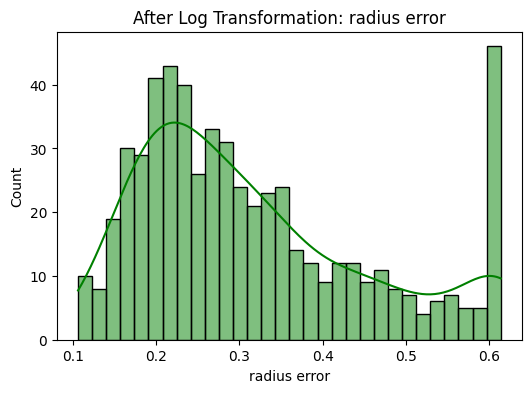

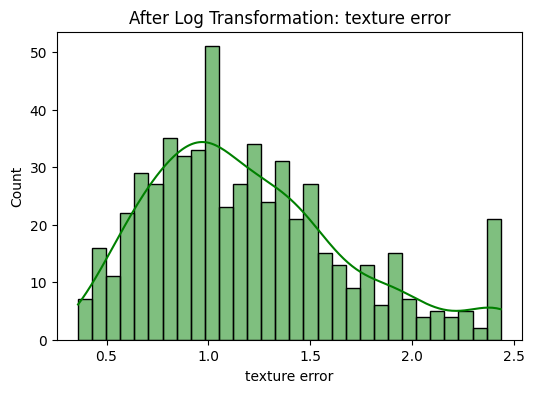

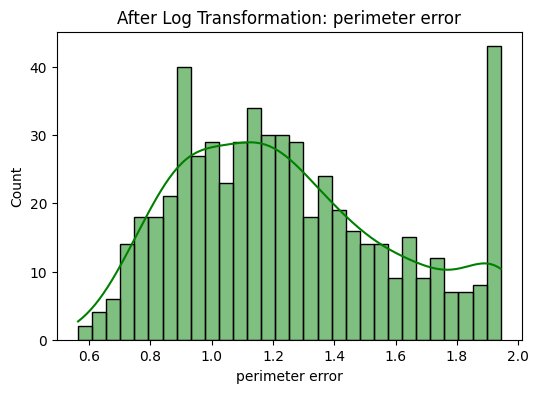

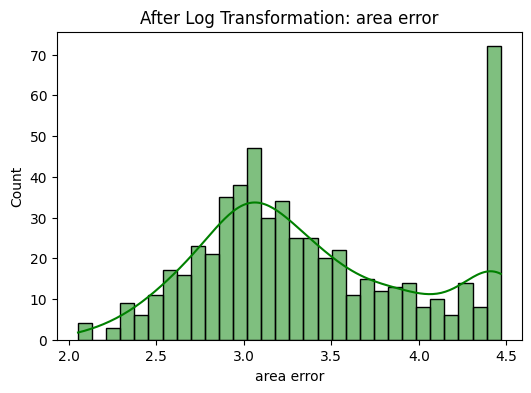

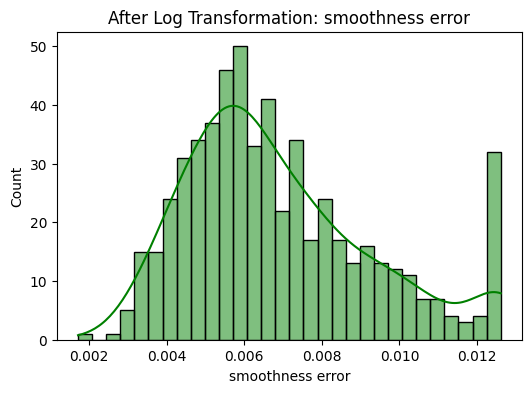

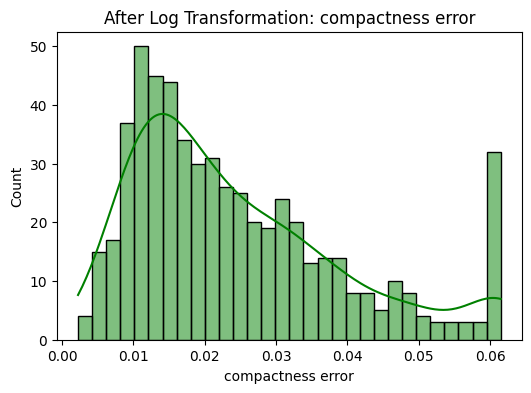

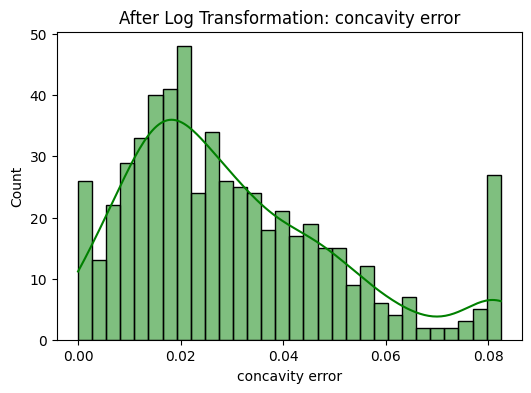

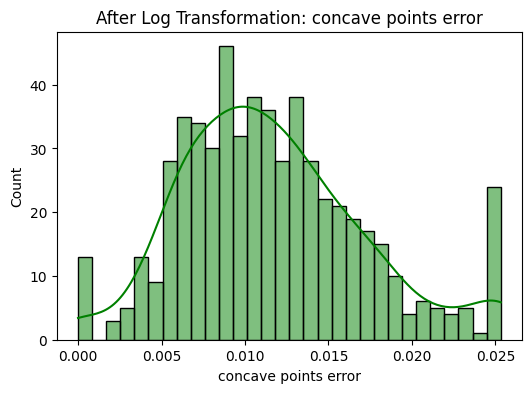

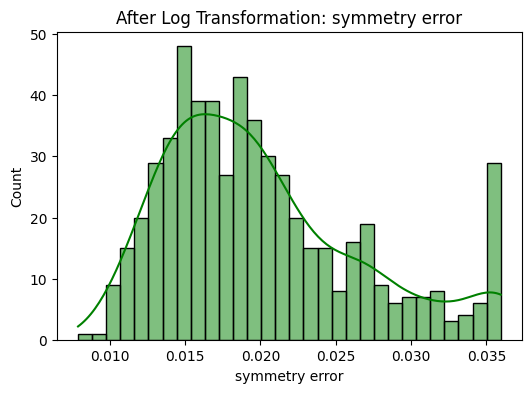

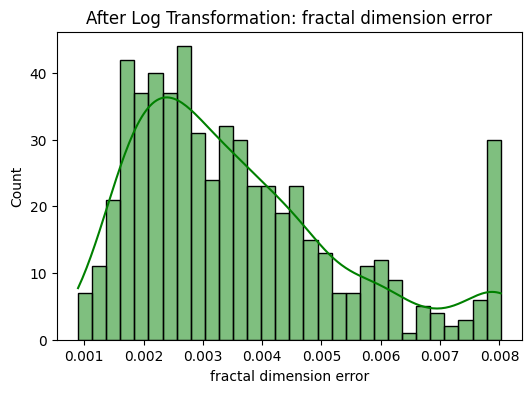

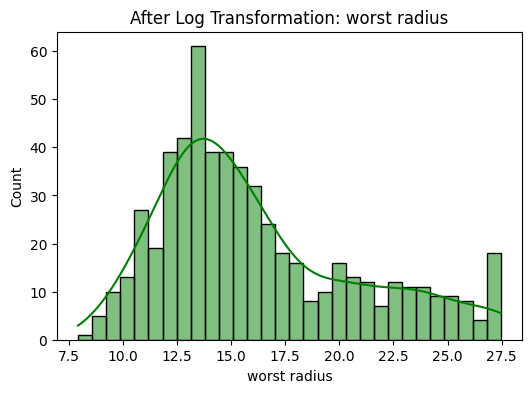

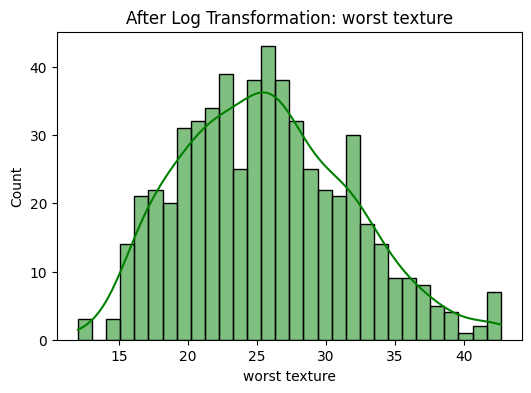

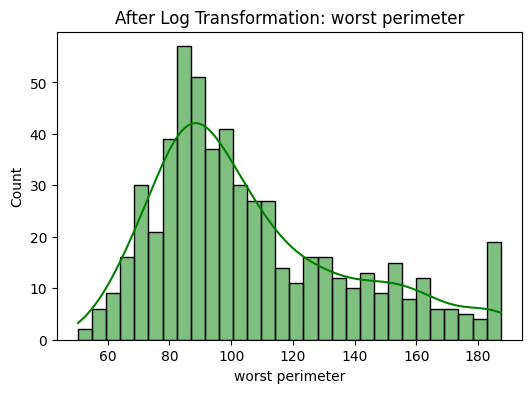

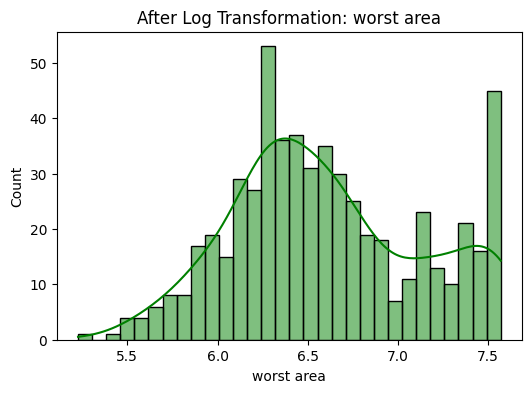

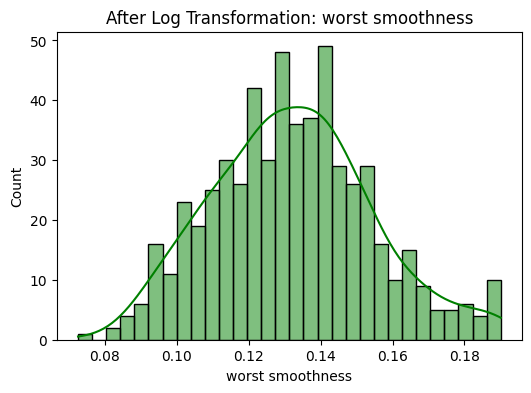

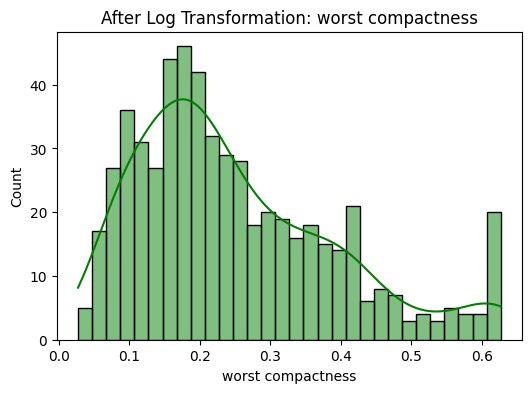

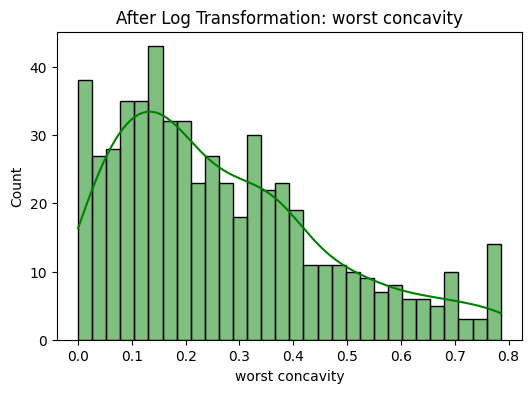

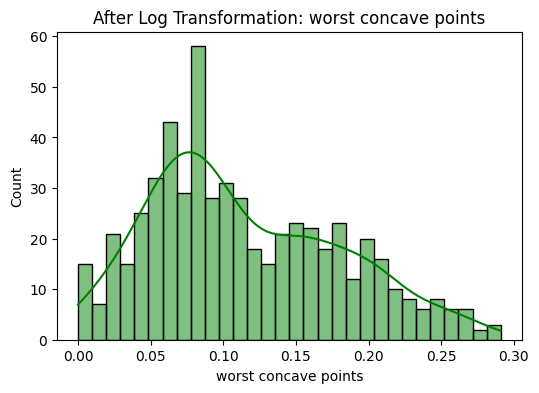

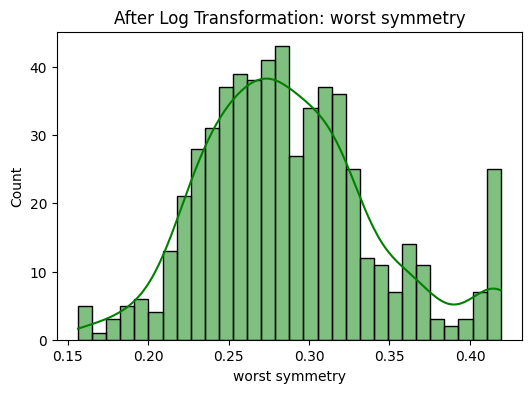

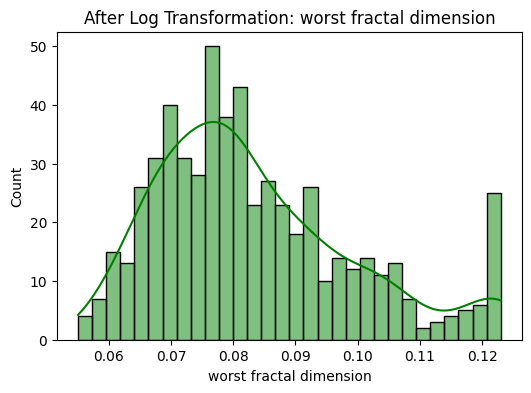

In [ ]:
# Final visualization after log transformation
for col in outliers_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='green')
    plt.title(f"After Log Transformation: {col}")
    plt.show()

In [ ]:
# Splitting feature and target
X = df_cleaned.drop(columns=['target','target_label'],axis=1) # Independent variable
y = df_cleaned['target'] # Dependent variable

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [ ]:
# Initialize models
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'SVM' : SVC(),
    'K-NN' : KNeighborsClassifier()
}

# Train and evaluate  models
results = [] # Empty list to store results

for name,model in models.items():
  model.fit(X_train, y_train)  # Train model
  y_pred = model.predict(X_test)  # Make predictions

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results.append({
    'Model' : name,
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : recall,
    'F1-Score' : f1
  })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Print Results DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.982456,0.985915,0.985915,0.985915
1,Decision Tree,0.947368,0.957746,0.957746,0.957746
2,Random Forest,0.964912,0.958904,0.985915,0.972222
3,SVM,0.973684,0.972222,0.985915,0.979021
4,K-NN,0.956140,0.958333,0.971831,0.965035


In [ ]:
# Generate classification report as a dictionary
cr_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert dictionary to DataFrame
cr_df = pd.DataFrame(cr_dict).transpose()

# Display the DataFrame
cr_df

,precision,recall,f1-score,support
0,0.952381,0.930233,0.941176,43.00000
1,0.958333,0.971831,0.965035,71.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.955357,0.951032,0.953106,114.00000
weighted avg,0.956088,0.956140,0.956036,114.00000


In [ ]:
# Sorting values in the descending format
sorted_results = results_df.sort_values(by="Accuracy", ascending=False)
sorted_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.982456,0.985915,0.985915,0.985915
3,SVM,0.973684,0.972222,0.985915,0.979021
2,Random Forest,0.964912,0.958904,0.985915,0.972222
4,K-NN,0.956140,0.958333,0.971831,0.965035
1,Decision Tree,0.947368,0.957746,0.957746,0.957746


# **Best & Worst Model Analysis**
📌 **Best Model**: `Linear Regression` due to higher `Accuracy,	Precision,	Recall,	F1-Score`

📌 **Worst Model**:  `Decision Tree` due to lower `Accuracy,	Precision,	Recall,	F1-Score`

# **Visualize results with a bar chart or table for better clarity**

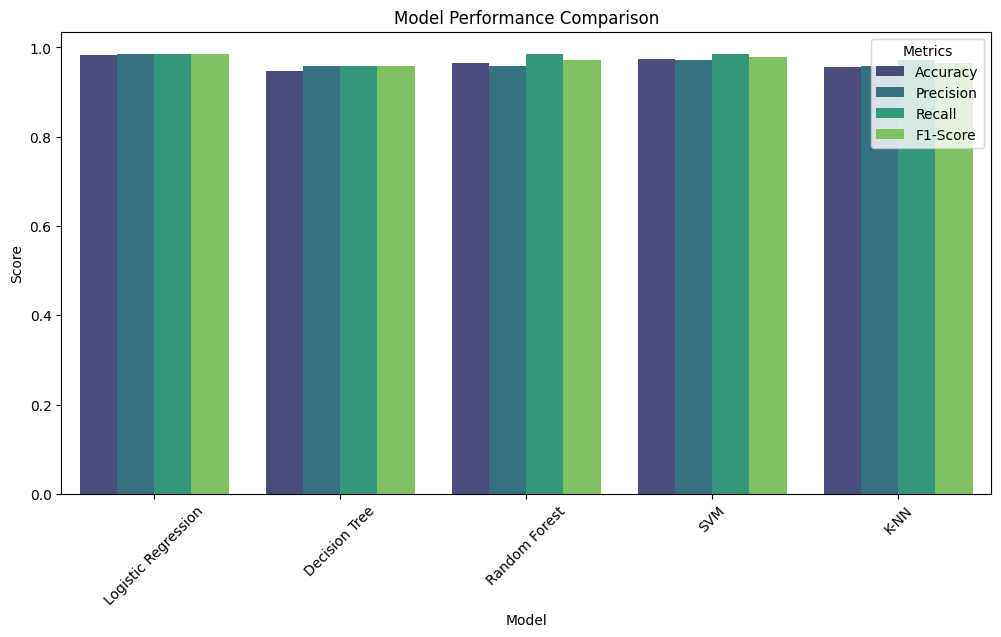

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Convert DataFrame to long format for better visualization
results_long = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a bar plot
sns.barplot(x="Model", y="Score", hue="Metric", data=results_long, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend(title="Metrics")
plt.show()